In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [ ]:
t = np.linspace(0,10,1000) # The domain of the function is [0,10]
dt = t[1]-t[0]
#sig = lambda x: np.exp(1j*2*np.pi*x)
sig = lambda x: np.cos(2*np.pi*x) # This is the signal
sigma = 6
csig = (1+np.exp(-sigma**2)-2*np.exp(-0.75*sigma**2))**(-0.5)
ksig = np.exp(-0.5*sigma**2)
morlet = lambda x: csig*np.pi**(-0.25)*np.exp(-0.5*x**2)*(np.exp(-1j*sigma*x) - ksig) # This is the (complex) Morlet mother wavelet
expon = lambda x: np.exp(-1j*2*np.pi*x) # Exponential function
#morlet = lambda x: csig*np.pi**(-0.25)*np.exp(-0.5*x**2)*(np.cos(-sigma*x) - ksig)

integrable = lambda a,b: np.abs(a)**(-0.5)*sig(t)*np.conj(morlet((t-b)/a))
integrable_2 = lambda x: sig(x)*expon(x)
integ = lambda a,b: dt*np.sum(integrable(a,b)[1:]-integrable(a,b)[:-1])

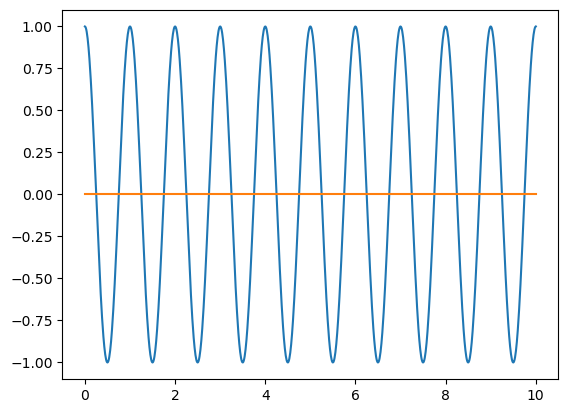

In [ ]:
# Plot the real and imaginary parts of the function
plt.plot(t,np.real(sig(t)))
plt.plot(t,np.imag(sig(t)))

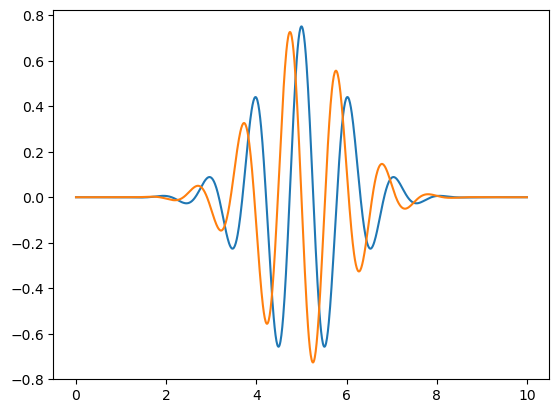

In [ ]:
# Plot the daughter wavelet that is unscaled but translated to the middle of the frame
plt.plot(t,np.real(morlet(t-5)))
plt.plot(t,np.imag(morlet(t-5)))

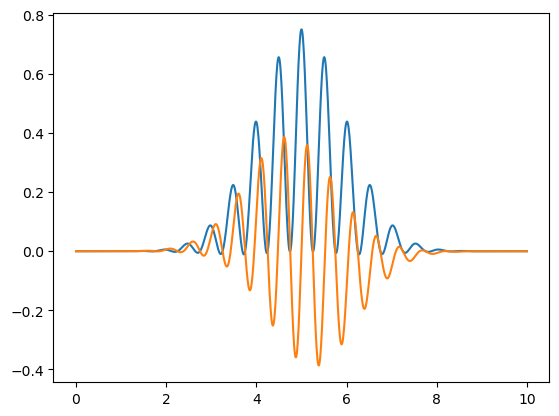

In [ ]:
# Plot the product of the signal and the daughter wavelet
plt.plot(t,np.real(np.abs(1)**(-0.5)*sig(t)*np.conj(morlet((t-5)/1))))
plt.plot(t,np.imag(np.abs(1)**(-0.5)*sig(t)*np.conj(morlet((t-5)/1))))

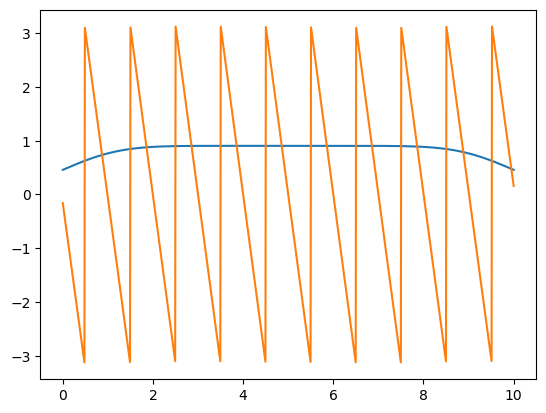

In [ ]:
# Conduct the wavelet transform for the signal with the daughter wavelet and plot it
integ_arr = np.zeros(t.size,dtype=complex)
for idx,ts in enumerate(t):
    new_integrable = lambda x: np.abs(1)**(-0.5)*sig(x)*np.conj(morlet((x-ts)/1))
    res = quad(new_integrable,0,10,complex_func=True)
    integ_arr[idx] = complex(*res)
plt.plot(t,np.abs(integ_arr)) # Amplitude
plt.plot(t,np.angle(integ_arr)) # Phase of the signal